In [0]:
# 패키지 불러오기
import matplotlib.pyplot as plt
import matplotlib
import numpy as np

from sklearn.tree import export_graphviz
import graphviz

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
import pandas as pd

#데이터 스케일링
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings(action='ignore')

import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [0]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler
from statsmodels.api import add_constant
%matplotlib inline
# 최적 모델, 파라미터 탐색
from sklearn.model_selection import GridSearchCV
# 예측/회귀 Decision Tree
from sklearn.tree import DecisionTreeRegressor
# 예측/회귀 Random Forest
from sklearn.ensemble import RandomForestRegressor
# 예측/회귀 Gradient Boosting
from sklearn.ensemble import GradientBoostingRegressor

In [0]:
# os환경
import os
# path설정
os.environ["PATH"]+=os.pathsep+"C:/Users/gw3768/다운로드/graphviz-2.38.msi"

In [172]:
# 데이터 구성하기
df_cust=pd.read_csv("movie_customer_cleaned_ver3.csv",engine='python')
df_cust.head()

,customer_id,gender,state,age,age_group,married,kids_under12,register_year,drop_flag,drop_year,last_down_date,down_flag,customer_sales,download_cnt,duration,expiration,first_down_date,activation_day
0,C5001,F,NC,51,50s,M,N,2014,Y,2015,2014-12-23 00:00:00,1,10.997323739842438,11.0,1.0,2015-12-23 00:00:00,2014-01-10,712
1,C5002,M,CA,23,20s,S,N,2014,N,.,2016-10-25 00:00:00,1,23.661645122771986,23.0,4.0,2017-10-25 00:00:00,2014-02-26,1337
2,C5003,F,TX,39,30s,M,N,2014,N,.,2018-12-21 00:00:00,1,48.82168057044957,50.0,4.0,2018-12-31 00:00:00,2014-01-19,1807
3,C5004,F,TX,69,60s+,M,N,2014,N,.,2014-12-30 00:00:00,1,38.82268563432438,40.0,4.0,2015-12-30 00:00:00,2014-02-28,670
4,C5005,F,SC,60,60s+,M,N,2014,N,.,2018-12-09 00:00:00,1,36.84197697319961,38.0,4.0,2018-12-31 00:00:00,2014-11-24,1498


In [173]:
# 결측치 확인
df_cust.isnull().sum()

customer_id          0
gender               0
state                0
age                  0
age_group            0
married              0
kids_under12         0
register_year        0
drop_flag            0
drop_year            0
last_down_date       0
down_flag            0
customer_sales       0
download_cnt       539
duration             0
expiration           0
first_down_date    539
activation_day       0
dtype: int64

In [174]:
# 결측치 확인
for i in df_cust.columns:
    nan_cnt = len(df_cust[df_cust[i].isna()])
    dot_cnt = len(df_cust[df_cust[i] == "."])
    print("%s의 결측치 개수 - %d, %d" % (i, nan_cnt, dot_cnt))

customer_id의 결측치 개수 - 0, 0
gender의 결측치 개수 - 0, 0
state의 결측치 개수 - 0, 0
age의 결측치 개수 - 0, 0
age_group의 결측치 개수 - 0, 0
married의 결측치 개수 - 0, 0
kids_under12의 결측치 개수 - 0, 0
register_year의 결측치 개수 - 0, 0
drop_flag의 결측치 개수 - 0, 0
drop_year의 결측치 개수 - 0, 2618
last_down_date의 결측치 개수 - 0, 539
down_flag의 결측치 개수 - 0, 0
customer_sales의 결측치 개수 - 0, 539
download_cnt의 결측치 개수 - 539, 0
duration의 결측치 개수 - 0, 0
expiration의 결측치 개수 - 0, 539
first_down_date의 결측치 개수 - 539, 0
activation_day의 결측치 개수 - 0, 0


In [0]:
# 문자열로 되어 있는 숫자변수를 int, float 타입으로 변환
def string_to_numeric(col_numeric):
    global df_cust
    for col in col_numeric:
        df_cust[col] = pd.to_numeric(df_cust[col], errors='coerce')
        df_cust = df_cust.replace(np.nan, '.', regex=True)
col_numeric = ['age', 'customer_sales', 'download_cnt','duration', 'activation_day']
string_to_numeric(col_numeric)

In [0]:
# 이상치 확인을 위해 customer_sales 칼럼을 float형으로 변환
for i in range(len(df_cust)):
    if df_cust['customer_sales'][i] == '.':
        df_cust['customer_sales'][i] = 0.0

In [0]:
df_cust['customer_sales'] = df_cust['customer_sales'].astype(float)

In [0]:
# 이상치 확인을 위해 download_cnt 칼럼 int형으로 변환
for i in range(len(df_cust)):
    if df_cust['download_cnt'][i] == '.':
        df_cust['download_cnt'][i] = 0

In [0]:
df_cust['download_cnt'] = df_cust['download_cnt'].astype(int)

In [0]:
for i in range(len(df_cust)):
    if df_cust['age_group'][i] == '60s+':
        df_cust['age_group'][i] = '60s'

In [0]:
# 이상치 확인

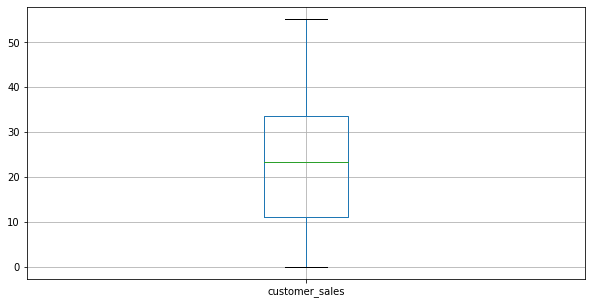

In [182]:
df_cust.boxplot(column='customer_sales',figsize=(10,5))

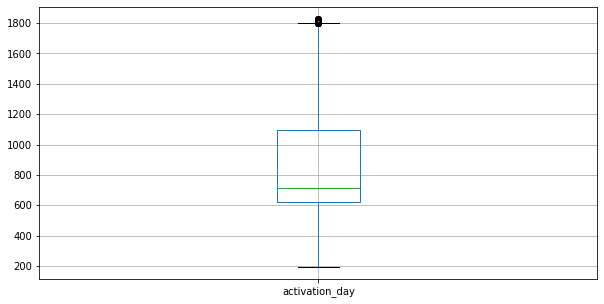

In [183]:
df_cust.boxplot(column='activation_day', figsize=(10,5))

In [0]:
# activation_day가 1880을 넘을 때 이상치가 분포되어 있는 것으로 보이므로 확인

In [185]:
df_cust.query("activation_day > 1800")

,customer_id,gender,state,age,age_group,married,kids_under12,register_year,drop_flag,drop_year,last_down_date,down_flag,customer_sales,download_cnt,duration,expiration,first_down_date,activation_day
2,C5003,F,TX,39,30s,M,N,2014,N,.,2018-12-21 00:00:00,1,48.821681,50,4.0,2018-12-31 00:00:00,2014-01-19,1807
36,C5037,M,AL,42,40s,M,Y,2014,N,.,2017-12-30 00:00:00,1,42.348929,44,4.0,2018-12-30 00:00:00,2014-01-07,1818
51,C5052,M,FL,64,60s,S,N,2014,N,.,2018-12-08 00:00:00,1,40.954892,42,4.0,2018-12-31 00:00:00,2014-01-08,1818
69,C5070,F,NY,41,40s,M,Y,2014,N,.,2018-12-12 00:00:00,1,37.468621,39,4.0,2018-12-31 00:00:00,2014-01-17,1809
76,C5077,M,NC,29,20s,S,N,2014,N,.,2017-12-29 00:00:00,1,34.483364,34,4.0,2018-12-29 00:00:00,2014-01-17,1807
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
964,C5965,F,CA,59,50s,M,N,2014,N,.,2017-12-25 00:00:00,1,43.205088,44,4.0,2018-12-25 00:00:00,2014-01-17,1803
965,C5966,F,IN,35,30s,M,Y,2014,N,.,2017-12-27 00:00:00,1,45.134443,46,4.0,2018-12-27 00:00:00,2014-01-15,1807
976,C5977,M,CA,23,20s,M,Y,2014,N,.,2018-12-25 00:00:00,1,33.409144,33,4.0,2018-12-31 00:00:00,2014-01-15,1811
982,C5983,F,OH,30,30s,M,Y,2014,N,.,2018-12-27 00:00:00,1,32.373761,33,4.0,2018-12-31 00:00:00,2014-01-24,1802


In [0]:
# 다운로드 건수가 많은 회원이고 오래된 회원일 수록 활성화일수가 많기 때문에 이상치라고 판단하지 않음

In [0]:
# register_year을 dummy변수로 만들기 위해 str타입으로 변환
df_cust['register_year'] = df_cust['register_year'].astype(str)

In [0]:
# 여자: 0 / 남자: 1
for i in range(len(df_cust)):
    if df_cust['gender'][i] == 'F':
        df_cust['gender'][i] = int(0)
    else:
        df_cust['gender'][i] =int(1)

In [0]:
# 결혼 X: 0 / 결혼 O : 1
for i in range(len(df_cust)):
    if df_cust['married'][i] == 'S':
        df_cust['married'][i] = int(0)
    else:
        df_cust['married'][i] = int(1)

In [0]:
# 12세 이하 자녀 유무
for i in range(len(df_cust)):
    if df_cust['kids_under12'][i] == 'N':
        df_cust['kids_under12'][i] = int(0)
    else:
        df_cust['kids_under12'][i] = int(1)

In [0]:
# 회원 탈퇴 여부
for i in range(len(df_cust)):
    if df_cust['drop_flag'][i] == 'N':
        df_cust['drop_flag'][i] = int(0)
    else:
        df_cust['drop_flag'][i] = int(1)

In [0]:
df_cust['married'] = df_cust['married'].astype(int)
df_cust['kids_under12'] = df_cust['kids_under12'].astype(int)
df_cust['gender'] = df_cust['gender'].astype(int)
df_cust['activation_day'] = df_cust['activation_day'].astype(int)

# 1. 다중회귀분석

In [211]:
df_cust_raw = df_cust.drop(["customer_id","drop_year","down_flag","duration",'drop_flag',"download_cnt","last_down_date","expiration","first_down_date","activation_day"],axis=1,inplace=False)
df_cust_raw

,gender,state,age,age_group,married,kids_under12,register_year,customer_sales
0,1,NC,51,50s,1,1,2014,10.997324
1,1,CA,23,20s,1,1,2014,23.661645
2,1,TX,39,30s,1,1,2014,48.821681
3,1,TX,69,60s,1,1,2014,38.822686
4,1,SC,60,60s,1,1,2014,36.841977
...,...,...,...,...,...,...,...,...
3272,1,SC,49,40s,1,1,2018,9.990000
3273,1,NV,61,60s,1,1,2018,21.770000
3274,1,CA,59,50s,1,1,2018,4.410000
3275,1,TX,36,30s,1,1,2018,13.480000


(1) age_group에 따른 dummy화 진행

In [0]:
df_cust_ageGroup = df_cust_raw.drop("age", axis = 1)

# Dummy 변수 생성

In [213]:
# get_dummies: 데이터의 문자형 변수에 대한 더미변수 생성
df_raw=pd.get_dummies(df_cust_ageGroup)
# 더미변수 생성된 데이터의 상위 5개 row를 확인
df_raw.head()

,gender,married,kids_under12,customer_sales,state_AL,state_AR,state_AZ,state_CA,state_CT,state_DC,state_DE,state_FL,state_GA,state_IA,state_IL,state_IN,state_KY,state_LA,state_MA,state_MD,state_ME,state_MI,state_MN,state_MS,state_NC,state_NH,state_NJ,state_NV,state_NY,state_OH,state_OR,state_PA,state_RI,state_SC,state_TN,state_TX,state_VA,state_VT,state_WI,state_WV,age_group_10s,age_group_20s,age_group_30s,age_group_40s,age_group_50s,age_group_60s,register_year_2014,register_year_2015,register_year_2016,register_year_2017,register_year_2018
0,1,1,1,10.997324,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0
1,1,1,1,23.661645,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0
2,1,1,1,48.821681,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
3,1,1,1,38.822686,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0
4,1,1,1,36.841977,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0


In [0]:
# state, age_group, register_year 변수에 대한 dummy화 진행

In [0]:
# 다중공선성을 문제를 고려한 변수 삭제
df_raw = df_raw.drop(['age_group_10s','register_year_2014','state_AL'], axis = 1)

In [216]:
df_raw.columns

Index(['gender', 'married', 'kids_under12', 'customer_sales', 'state_AR',
       'state_AZ', 'state_CA', 'state_CT', 'state_DC', 'state_DE', 'state_FL',
       'state_GA', 'state_IA', 'state_IL', 'state_IN', 'state_KY', 'state_LA',
       'state_MA', 'state_MD', 'state_ME', 'state_MI', 'state_MN', 'state_MS',
       'state_NC', 'state_NH', 'state_NJ', 'state_NV', 'state_NY', 'state_OH',
       'state_OR', 'state_PA', 'state_RI', 'state_SC', 'state_TN', 'state_TX',
       'state_VA', 'state_VT', 'state_WI', 'state_WV', 'age_group_20s',
       'age_group_30s', 'age_group_40s', 'age_group_50s', 'age_group_60s',
       'register_year_2015', 'register_year_2016', 'register_year_2017',
       'register_year_2018'],
      dtype='object')

In [217]:
# 전체 변수를 넣은 회귀모델
reg_model = smf.ols(formula = "customer_sales ~ gender+married+kids_under12+age_group_20s+age_group_30s+age_group_40s+age_group_50s+age_group_60s+register_year_2015+register_year_2016+register_year_2017+register_year_2018+state_AR+state_AZ+state_CA+state_CT+state_DC+state_DE+state_FL+state_GA+state_IA+state_IL+state_IN+state_KY+state_LA+state_MA+state_MD+state_ME+state_MI+state_MN+state_MS+state_NC+state_NH+state_NJ+state_NV+state_NY+state_OH+\
       state_OR+state_PA+state_RI+state_SC+state_TN+state_TX+state_VA+state_VT+state_WI+state_WV", data = df_raw)
reg_result = reg_model.fit()
print(reg_result.summary())

                            OLS Regression Results                            
Dep. Variable:         customer_sales   R-squared:                       0.397
Model:                            OLS   Adj. R-squared:                  0.389
Method:                 Least Squares   F-statistic:                     48.44
Date:                Thu, 07 May 2020   Prob (F-statistic):          7.49e-317
Time:                        14:41:48   Log-Likelihood:                -12489.
No. Observations:                3277   AIC:                         2.507e+04
Df Residuals:                    3232   BIC:                         2.534e+04
Df Model:                          44                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept          -1.089e+14   5.66

In [219]:
# 설명변수간의 다중공선성
df_raw_x = df_raw.drop('customer_sales',axis = 1)
df_raw_y = df_raw['customer_sales']
# statsmodels의 상수항 추가 함수 적용
df_raw_x_const = add_constant(df_raw_x)

# 다중공선성 저장
df_rfe_vif=pd.DataFrame()
df_rfe_vif["variable"]=df_raw_x_const.columns
df_rfe_vif["VIF"]=[variance_inflation_factor(df_raw_x_const.values,i) for i in range(df_raw_x_const.shape[1])]
df_rfe_vif.round(3)

,variable,VIF
0,gender,0.000
1,married,0.000
2,kids_under12,0.000
3,state_AR,1.606
4,state_AZ,1.216
5,state_CA,6.714
6,state_CT,1.348
7,state_DC,1.450
8,state_DE,1.102
9,state_FL,3.929


In [0]:
# 다중공선성이 8이상인 변수들(age_group_30s,age_group_40s,age_group_60s)은 삭제 결정

In [149]:
# 다중공선성이 8이상인 변수들을 제거한 회귀 모델
# 전체 변수를 넣은 회귀모델
reg_model = smf.ols(formula = "customer_sales ~ gender+married+kids_under12+age_group_20s+age_group_60s+register_year_2015+register_year_2016+register_year_2017+register_year_2018+state_AR+state_AZ+state_CA+state_CT+state_DC+state_DE+state_FL+state_GA+state_IA+state_IL+state_IN+state_KY+state_LA+state_MA+state_MD+state_ME+state_MI+state_MN+state_MS+state_NC+state_NH+state_NJ+state_NV+state_NY+state_OH+\
       state_OR+state_PA+state_RI+state_SC+state_TN+state_TX+state_VA+state_VT+state_WI+state_WV", data = df_raw)
reg_result = reg_model.fit()
print(reg_result.summary())

                            OLS Regression Results                            
Dep. Variable:         customer_sales   R-squared:                       0.388
Model:                            OLS   Adj. R-squared:                  0.381
Method:                 Least Squares   F-statistic:                     50.10
Date:                Thu, 07 May 2020   Prob (F-statistic):          3.68e-309
Time:                        14:37:32   Log-Likelihood:                -12513.
No. Observations:                3277   AIC:                         2.511e+04
Df Residuals:                    3235   BIC:                         2.537e+04
Df Model:                          41                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept          -1.071e+14   5.67

In [0]:
# p-value가 0.5 이상인 변수 제거하기로 결정

In [151]:
# 설명변수간의 다중공선성
df_raw_x = df_raw.drop(['customer_sales','age_group_30s','age_group_40s','age_group_60s'],axis = 1)
# statsmodels의 상수항 추가 함수 적용
df_raw_x_const = add_constant(df_raw_x)

# 다중공선성 저장
df_rfe_vif=pd.DataFrame()
df_rfe_vif["variable"]=df_raw_x_const.columns
df_rfe_vif["VIF"]=[variance_inflation_factor(df_raw_x_const.values,i) for i in range(df_raw_x_const.shape[1])]
df_rfe_vif.round(3)

,variable,VIF
0,gender,0.000
1,married,0.000
2,kids_under12,0.000
3,state_AR,1.599
4,state_AZ,1.216
5,state_CA,6.705
6,state_CT,1.347
7,state_DC,1.444
8,state_DE,1.102
9,state_FL,3.922


In [0]:
# 변수들의 다중공선성이 모두 10보다 낮음으로 문제가 없을 수 있지만 과적합 방지를 위해 p-value가 0.5이상인 변수 제거

In [153]:
# p- value가 0.5 이상인 변수들을 제거한 회귀 모델
# 전체 변수를 넣은 회귀모델
reg_model = smf.ols(formula = "customer_sales ~ gender+married+age_group_20s+age_group_60s+register_year_2015+register_year_2016+register_year_2017+register_year_2018+state_AR+state_AZ+state_CA+state_DC+state_FL+state_GA+state_IL+state_KY+state_MA+state_MS+state_NC+state_NV+state_NY+state_OH+\
       state_OR+state_RI+state_SC+state_VA+state_WV", data = df_raw)
reg_result = reg_model.fit()
print(reg_result.summary())

                            OLS Regression Results                            
Dep. Variable:         customer_sales   R-squared:                       0.388
Model:                            OLS   Adj. R-squared:                  0.383
Method:                 Least Squares   F-statistic:                     82.41
Date:                Thu, 07 May 2020   Prob (F-statistic):          3.95e-323
Time:                        14:37:33   Log-Likelihood:                -12515.
No. Observations:                3277   AIC:                         2.508e+04
Df Residuals:                    3251   BIC:                         2.524e+04
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept          -1.078e+14   5.69

In [154]:
# 설명변수간의 다중공선성
df_raw_x = df_raw.drop(['customer_sales','kids_under12','age_group_30s','age_group_40s','age_group_50s','state_CT','state_DE','state_IA','state_IA','state_IN','state_LA','state_MD','state_ME','state_MI','state_MN','state_NH','state_NJ','state_TN','state_TX','state_VT','state_WI'],axis = 1)
# statsmodels의 상수항 추가 함수 적용 
df_raw_x_const = add_constant(df_raw_x)

# 다중공선성 저장
df_rfe_vif=pd.DataFrame()
df_rfe_vif["variable"]=df_raw_x_const.columns
df_rfe_vif["VIF"]=[variance_inflation_factor(df_raw_x_const.values,i) for i in range(df_raw_x_const.shape[1])]
df_rfe_vif.round(3)

,variable,VIF
0,gender,0.000
1,married,0.000
2,state_AR,1.038
3,state_AZ,1.013
4,state_CA,1.311
5,state_DC,1.026
6,state_FL,1.168
7,state_GA,1.087
8,state_IL,1.063
9,state_KY,1.051


# 후진제거법 진행

1)-1 전체 변수중 변수 중요도가 높은 10개 선택

In [155]:
# RFE함수 : 입력된 모델을 이용하여 변수중요도가 낮은 순으로 순차적으로 제거
# 목표 변수 분리
df_raw_y=df_raw["customer_sales"]
df_raw_x = df_raw.drop("customer_sales", axis = 1)
# sklearn의 선형회귀 모델
model=LinearRegression()
# 전체 변수 중 10개의 변수가 남을 때까지 변수 선택
rfe=RFE(estimator=model,n_features_to_select=10).fit(df_raw_x,df_raw_y)
# 선택된 변수
selected_cols=df_raw_x.columns[rfe.support_]
# 제거된 변수
removed_cols=df_raw_x.columns[~rfe.support_]

print("Selected Variables:{}".format(selected_cols))
print("Removed Variables:{}".format(removed_cols))

Selected Variables:Index(['state_NV', 'state_OR', 'state_RI', 'state_SC', 'age_group_40s',
       'age_group_60s', 'register_year_2015', 'register_year_2016',
       'register_year_2017', 'register_year_2018'],
      dtype='object')
Removed Variables:Index(['gender', 'married', 'kids_under12', 'state_AR', 'state_AZ', 'state_CA',
       'state_CT', 'state_DC', 'state_DE', 'state_FL', 'state_GA', 'state_IA',
       'state_IL', 'state_IN', 'state_KY', 'state_LA', 'state_MA', 'state_MD',
       'state_ME', 'state_MI', 'state_MN', 'state_MS', 'state_NC', 'state_NH',
       'state_NJ', 'state_NY', 'state_OH', 'state_PA', 'state_TN', 'state_TX',
       'state_VA', 'state_VT', 'state_WI', 'state_WV', 'age_group_20s',
       'age_group_30s', 'age_group_50s'],
      dtype='object')


In [156]:
# 회귀 모델 생성
reg_model = smf.ols(formula ="customer_sales ~age_group_40s+age_group_60s+register_year_2015+register_year_2016+register_year_2017+register_year_2018+state_NV+state_RI+state_SC", data = df_raw)

reg_result = reg_model.fit()
print(reg_result.summary())

                            OLS Regression Results                            
Dep. Variable:         customer_sales   R-squared:                       0.383
Model:                            OLS   Adj. R-squared:                  0.381
Method:                 Least Squares   F-statistic:                     224.9
Date:                Thu, 07 May 2020   Prob (F-statistic):               0.00
Time:                        14:37:36   Log-Likelihood:                -12529.
No. Observations:                3277   AIC:                         2.508e+04
Df Residuals:                    3267   BIC:                         2.514e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             30.1310      0

In [0]:
# state_OR는 p-value가 0.45로 높고 제거 했을 시 R-Square 값에 크게 변화를 주지 않음으로 삭제 결정

In [158]:
# 설명변수간의 다중공선성
df_raw_x = df_raw[selected_cols].drop('state_OR', axis = 1)
# statsmodels의 상수항 추가 함수 적용
df_raw_x_const = add_constant(df_raw_x)

# 다중공선성 저장
df_rfe_vif=pd.DataFrame()
df_rfe_vif["variable"]=df_raw_x_const.columns
df_rfe_vif["VIF"]=[variance_inflation_factor(df_raw_x_const.values,i) for i in range(df_raw_x_const.shape[1])]
df_rfe_vif.round(3)

,variable,VIF
0,const,4.109
1,state_NV,1.007
2,state_RI,1.001
3,state_SC,1.006
4,age_group_40s,1.090
5,age_group_60s,1.088
6,register_year_2015,1.337
7,register_year_2016,1.318
8,register_year_2017,1.362
9,register_year_2018,1.007


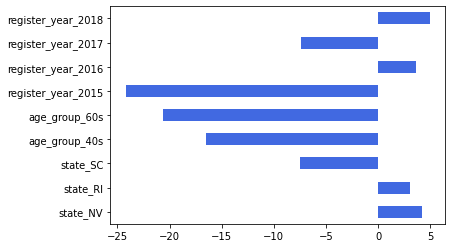

In [159]:
# 설명변수 중요도
df_reg_coef = pd.DataFrame({"Coef":reg_result.params.values[1:]}, index = df_raw_x.columns)
df_reg_coef.plot.barh(y ="Coef", legend = False, color= 'royalblue')

2) 전체 변수중 변수 중요도가 높은 15개 선택

In [160]:
# RFE함수 : 입력된 모델을 이용하여 변수중요도가 낮은 순으로 순차적으로 제거
# 목표 변수 분리
df_raw_y=df_raw["customer_sales"]
df_raw_x = df_raw.drop("customer_sales", axis = 1)
# sklearn의 선형회귀 모델
model=LinearRegression()
# 전체 변수 중 15개의 변수가 남을 때까지 변수 선택
rfe=RFE(estimator=model,n_features_to_select=15).fit(df_raw_x,df_raw_y)
# 선택된 변수
selected_cols=df_raw_x.columns[rfe.support_]
# 제거된 변수
removed_cols=df_raw_x.columns[~rfe.support_]

print("Selected Variables:{}".format(selected_cols))
print("Removed Variables:{}".format(removed_cols))

Selected Variables:Index(['state_AZ', 'state_NH', 'state_NV', 'state_OR', 'state_RI', 'state_SC',
       'state_WI', 'age_group_30s', 'age_group_40s', 'age_group_50s',
       'age_group_60s', 'register_year_2015', 'register_year_2016',
       'register_year_2017', 'register_year_2018'],
      dtype='object')
Removed Variables:Index(['gender', 'married', 'kids_under12', 'state_AR', 'state_CA', 'state_CT',
       'state_DC', 'state_DE', 'state_FL', 'state_GA', 'state_IA', 'state_IL',
       'state_IN', 'state_KY', 'state_LA', 'state_MA', 'state_MD', 'state_ME',
       'state_MI', 'state_MN', 'state_MS', 'state_NC', 'state_NJ', 'state_NY',
       'state_OH', 'state_PA', 'state_TN', 'state_TX', 'state_VA', 'state_VT',
       'state_WV', 'age_group_20s'],
      dtype='object')


In [161]:
# 회귀 모델 생성
reg_model = smf.ols(formula ="customer_sales ~age_group_30s+age_group_40s+age_group_50s+age_group_60s+register_year_2015+register_year_2016+register_year_2017+register_year_2018+state_AZ+state_NH+state_NV+state_OR+state_RI+state_SC+state_WI", data = df_raw)

reg_result = reg_model.fit()
print(reg_result.summary())

                            OLS Regression Results                            
Dep. Variable:         customer_sales   R-squared:                       0.395
Model:                            OLS   Adj. R-squared:                  0.392
Method:                 Least Squares   F-statistic:                     141.9
Date:                Thu, 07 May 2020   Prob (F-statistic):               0.00
Time:                        14:37:42   Log-Likelihood:                -12495.
No. Observations:                3277   AIC:                         2.502e+04
Df Residuals:                    3261   BIC:                         2.512e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             27.5197      0

In [0]:
# R-square에 영향을 크게 주지 않는 선에서 p-value가 0.3이상인 변수 삭제

In [163]:
# 회귀 모델 생성
reg_model = smf.ols(formula ="customer_sales ~age_group_30s+age_group_40s+age_group_50s+age_group_60s+register_year_2015+register_year_2016+register_year_2017+register_year_2018+state_NV+state_RI+state_SC", data = df_raw)

reg_result = reg_model.fit()
print(reg_result.summary())

                            OLS Regression Results                            
Dep. Variable:         customer_sales   R-squared:                       0.394
Model:                            OLS   Adj. R-squared:                  0.392
Method:                 Least Squares   F-statistic:                     193.3
Date:                Thu, 07 May 2020   Prob (F-statistic):               0.00
Time:                        14:37:42   Log-Likelihood:                -12497.
No. Observations:                3277   AIC:                         2.502e+04
Df Residuals:                    3265   BIC:                         2.509e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             27.5413      0

In [66]:
# 설명변수간의 다중공선성
df_raw_x = df_raw[selected_cols].drop(['state_AZ','state_NH','state_OR','state_WI'], axis = 1)
# statsmodels의 상수항 추가 함수 적용
df_raw_x_const = add_constant(df_raw_x)

# 다중공선성 저장
df_rfe_vif=pd.DataFrame()
df_rfe_vif["variable"]=df_raw_x_const.columns
df_rfe_vif["VIF"]=[variance_inflation_factor(df_raw_x_const.values,i) for i in range(df_raw_x_const.shape[1])]
df_rfe_vif.round(3)

,variable,VIF
0,const,7.417
1,state_NV,1.007
2,state_RI,1.002
3,state_SC,1.006
4,age_group_30s,1.618
5,age_group_40s,1.624
6,age_group_50s,1.544
7,age_group_60s,1.699
8,register_year_2015,1.337
9,register_year_2016,1.322


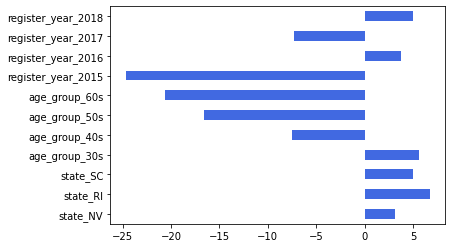

In [67]:
# 설명변수 중요도
df_reg_coef = pd.DataFrame({"Coef":reg_result.params.values[1:]}, index = df_raw_x.columns)
df_reg_coef.plot.barh(y ="Coef", legend = False, color= 'royalblue')

(2) age변수 dummy(연령대)가 아닌 연속형으로 분석

In [72]:
df_cust_raw = df_cust.drop(["customer_id","drop_year","down_flag","duration",'drop_flag',"download_cnt","last_down_date","expiration","first_down_date","age_group"],axis=1,inplace=False)
df_cust_raw

,gender,state,age,married,kids_under12,register_year,customer_sales,activation_day
0,0,NC,51,1,0,2014,10.997324,712
1,1,CA,23,0,0,2014,23.661645,1337
2,0,TX,39,1,0,2014,48.821681,1807
3,0,TX,69,1,0,2014,38.822686,670
4,0,SC,60,1,0,2014,36.841977,1498
...,...,...,...,...,...,...,...,...
3272,0,SC,49,1,0,2018,9.990000,310
3273,0,NV,61,1,0,2018,21.770000,334
3274,0,CA,59,0,0,2018,4.410000,230
3275,0,TX,36,0,1,2018,13.480000,358


In [0]:
# scaling 진행

In [0]:
# 목표변수와 dummy로 만들 변수 제외 후 scaling
df_raw_x = df_cust_raw.drop(['customer_sales','activation_day','married','kids_under12','gender','register_year','state'], axis = 1)

In [0]:
scaler = StandardScaler()
cols = df_raw_x.columns
np_scaled = scaler.fit_transform(df_raw_x)
df_scaled = pd.DataFrame(np_scaled, columns = cols)

In [0]:
df_scaled['customer_sales'] = df_cust['customer_sales']
df_scaled['register_year'] = df_cust['register_year']
df_scaled['married'] = df_cust['married']
df_scaled['kids_under12'] = df_cust['kids_under12']
df_scaled['gender'] = df_cust['gender']
df_scaled['state'] = df_cust['state']

In [77]:
# get_dummies: 데이터의 문자형 변수에 대한 더미변수 생성
df_raw=pd.get_dummies(df_scaled)
# 더미변수 생성된 데이터의 상위 5개 row를 확인
df_raw.head()

,age,customer_sales,married,kids_under12,gender,register_year_2014,register_year_2015,register_year_2016,register_year_2017,register_year_2018,state_AL,state_AR,state_AZ,state_CA,state_CT,state_DC,state_DE,state_FL,state_GA,state_IA,state_IL,state_IN,state_KY,state_LA,state_MA,state_MD,state_ME,state_MI,state_MN,state_MS,state_NC,state_NH,state_NJ,state_NV,state_NY,state_OH,state_OR,state_PA,state_RI,state_SC,state_TN,state_TX,state_VA,state_VT,state_WI,state_WV
0,0.285055,10.997324,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,-1.382280,23.661645,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,-0.429517,48.821681,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,1.356913,38.822686,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,0.820984,36.841977,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [0]:
df_raw = df_raw.drop(['register_year_2014','state_AL'], axis = 1)

In [79]:
df_raw.columns

Index(['age', 'customer_sales', 'married', 'kids_under12', 'gender',
       'register_year_2015', 'register_year_2016', 'register_year_2017',
       'register_year_2018', 'state_AR', 'state_AZ', 'state_CA', 'state_CT',
       'state_DC', 'state_DE', 'state_FL', 'state_GA', 'state_IA', 'state_IL',
       'state_IN', 'state_KY', 'state_LA', 'state_MA', 'state_MD', 'state_ME',
       'state_MI', 'state_MN', 'state_MS', 'state_NC', 'state_NH', 'state_NJ',
       'state_NV', 'state_NY', 'state_OH', 'state_OR', 'state_PA', 'state_RI',
       'state_SC', 'state_TN', 'state_TX', 'state_VA', 'state_VT', 'state_WI',
       'state_WV'],
      dtype='object')

In [80]:
# 전체 변수로 만든 회귀모델
reg_model_scaled = smf.ols(formula = "customer_sales ~ gender+married+kids_under12+age+register_year_2015+register_year_2016+register_year_2017+register_year_2018+state_AR+state_AZ+state_CA+state_CT+state_DC+state_DE+state_FL+state_GA+state_IA+state_IL+state_IN+state_KY+state_LA+state_MA+state_MD+state_ME+state_MI+state_MN+state_MS+state_NC+state_NH+state_NJ+state_NV+state_NY+state_OH+\
       state_OR+state_PA+state_RI+state_SC+state_TN+state_TX+state_VA+state_VT+state_WI+state_WV", data = df_raw)
reg_result_scaled = reg_model_scaled.fit()
print(reg_result_scaled.summary())

                            OLS Regression Results                            
Dep. Variable:         customer_sales   R-squared:                       0.393
Model:                            OLS   Adj. R-squared:                  0.385
Method:                 Least Squares   F-statistic:                     48.67
Date:                Thu, 07 May 2020   Prob (F-statistic):          1.13e-312
Time:                        14:19:50   Log-Likelihood:                -12501.
No. Observations:                3277   AIC:                         2.509e+04
Df Residuals:                    3233   BIC:                         2.536e+04
Df Model:                          43                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             32.2054      1

In [81]:
# 설명변수간의 다중공선성
df_raw_x = df_raw.drop(['customer_sales'],axis = 1)
# statsmodels의 상수항 추가 함수 적용
df_raw_x_const = add_constant(df_raw_x)

# 다중공선성 저장
df_rfe_vif=pd.DataFrame()
df_rfe_vif["variable"]=df_raw_x_const.columns
df_rfe_vif["VIF"]=[variance_inflation_factor(df_raw_x_const.values,i) for i in range(df_raw_x_const.shape[1])]
df_rfe_vif.round(3)

,variable,VIF
0,const,54.644
1,age,1.169
2,married,1.315
3,kids_under12,1.458
4,gender,1.026
5,register_year_2015,1.350
6,register_year_2016,1.331
7,register_year_2017,1.377
8,register_year_2018,1.013
9,state_AR,1.602


In [0]:
# 모든 변수들의 다중공선성이 10이하로 문제가 없음을 알 수 있다
# 하지만 변수가 많고 p-value가 높은 변수들이 있어서 과적합을 방지하기 위해
# p-value가 0.5이상인 변수 삭제 결정

In [83]:
# p-value가 0.5 이상인 변수 삭제 후 회귀 모델
reg_model_scaled = smf.ols(formula = "customer_sales ~ gender+married+kids_under12+age+register_year_2015+register_year_2016+register_year_2017+register_year_2018+state_NV+\
       +state_RI+state_SC", data = df_raw)
reg_result_scaled = reg_model_scaled.fit()
print(reg_result_scaled.summary())

                            OLS Regression Results                            
Dep. Variable:         customer_sales   R-squared:                       0.390
Model:                            OLS   Adj. R-squared:                  0.388
Method:                 Least Squares   F-statistic:                     189.6
Date:                Thu, 07 May 2020   Prob (F-statistic):               0.00
Time:                        14:19:55   Log-Likelihood:                -12510.
No. Observations:                3277   AIC:                         2.504e+04
Df Residuals:                    3265   BIC:                         2.512e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             30.5136      0

In [0]:
# R-square 값에 영향을 크게 주지 않는 선에서 p-value가 높은 변수들 제거

In [85]:
# 설명변수간의 다중공선성
df_raw_x = df_raw[['gender', 'married','kids_under12', 'age','register_year_2015', 'register_year_2016', 'register_year_2017','register_year_2018','state_NV','state_RI','state_SC']]
# statsmodels의 상수항 추가 함수 적용
df_raw_x_const = add_constant(df_raw_x)

# 다중공선성 저장
df_rfe_vif=pd.DataFrame()
df_rfe_vif["variable"]=df_raw_x_const.columns
df_rfe_vif["VIF"]=[variance_inflation_factor(df_raw_x_const.values,i) for i in range(df_raw_x_const.shape[1])]
df_rfe_vif.round(3)

,variable,VIF
0,const,6.533
1,gender,1.012
2,married,1.273
3,kids_under12,1.442
4,age,1.155
5,register_year_2015,1.337
6,register_year_2016,1.319
7,register_year_2017,1.364
8,register_year_2018,1.007
9,state_NV,1.007


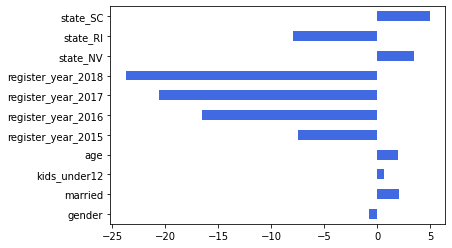

In [86]:
# 설명변수 중요도
df_reg_coef = pd.DataFrame({"Coef":reg_result_scaled.params.values[1:]}, index = df_raw_x.columns)
df_reg_coef.plot.barh(y ="Coef", legend = False, color= 'royalblue')

# 후진제거법 진행

In [87]:
# RFE함수 : 입력된 모델을 이용하여 변수중요도가 낮은 순으로 순차적으로 제거
# 목표 변수 분리
df_raw_y=df_raw["customer_sales"]
df_raw_x = df_raw.drop("customer_sales", axis = 1)
# sklearn의 선형회귀 모델
model=LinearRegression()
# 전체 변수 중 10개의 변수가 남을 때까지 변수 선택
rfe=RFE(estimator=model,n_features_to_select=10).fit(df_raw_x,df_raw_y)
# 선택된 변수
selected_cols=df_raw_x.columns[rfe.support_]
# 제거된 변수
removed_cols=df_raw_x.columns[~rfe.support_]

print("Selected Variables:{}".format(selected_cols))
print("Removed Variables:{}".format(removed_cols))

Selected Variables:Index(['register_year_2015', 'register_year_2016', 'register_year_2017',
       'register_year_2018', 'state_MA', 'state_NV', 'state_OR', 'state_RI',
       'state_SC', 'state_WI'],
      dtype='object')
Removed Variables:Index(['age', 'married', 'kids_under12', 'gender', 'state_AR', 'state_AZ',
       'state_CA', 'state_CT', 'state_DC', 'state_DE', 'state_FL', 'state_GA',
       'state_IA', 'state_IL', 'state_IN', 'state_KY', 'state_LA', 'state_MD',
       'state_ME', 'state_MI', 'state_MN', 'state_MS', 'state_NC', 'state_NH',
       'state_NJ', 'state_NY', 'state_OH', 'state_PA', 'state_TN', 'state_TX',
       'state_VA', 'state_VT', 'state_WV'],
      dtype='object')


In [88]:
reg_model = smf.ols(formula = "customer_sales ~ register_year_2015+register_year_2016+register_year_2017+register_year_2018+state_MA+state_NV+\
       state_OR+state_RI+state_SC+state_WI", data = df_raw)
reg_result = reg_model.fit()
print(reg_result.summary())

                            OLS Regression Results                            
Dep. Variable:         customer_sales   R-squared:                       0.367
Model:                            OLS   Adj. R-squared:                  0.365
Method:                 Least Squares   F-statistic:                     189.2
Date:                Thu, 07 May 2020   Prob (F-statistic):          3.87e-315
Time:                        14:20:02   Log-Likelihood:                -12570.
No. Observations:                3277   AIC:                         2.516e+04
Df Residuals:                    3266   BIC:                         2.523e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             31.6467      0

In [89]:
# 설명변수간의 다중공선성
df_raw_x = df_raw[selected_cols]
# statsmodels의 상수항 추가 함수 적용
df_raw_x_const = add_constant(df_raw_x)

# 다중공선성 저장
df_rfe_vif=pd.DataFrame()
df_rfe_vif["variable"]=df_raw_x_const.columns
df_rfe_vif["VIF"]=[variance_inflation_factor(df_raw_x_const.values,i) for i in range(df_raw_x_const.shape[1])]
df_rfe_vif.round(3)

,variable,VIF
0,const,3.389
1,register_year_2015,1.337
2,register_year_2016,1.319
3,register_year_2017,1.363
4,register_year_2018,1.006
5,state_MA,1.002
6,state_NV,1.007
7,state_OR,1.001
8,state_RI,1.001
9,state_SC,1.007


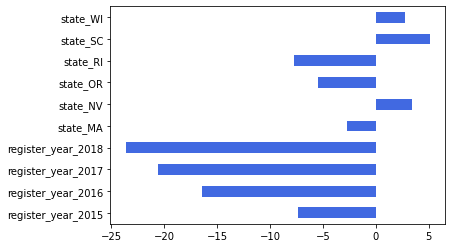

In [90]:
# 설명변수 중요도
df_reg_coef = pd.DataFrame({"Coef":reg_result.params.values[1:]}, index = df_raw_x.columns)
df_reg_coef.plot.barh(y ="Coef", legend = False, color= 'royalblue')

# 다중회귀최종모델

In [220]:
# 회귀 모델 생성
reg_model_final = smf.ols(formula ="customer_sales ~age_group_30s+age_group_40s+age_group_50s+age_group_60s+register_year_2015+register_year_2016+register_year_2017+register_year_2018++state_NV+state_RI+state_SC", data = df_raw)

reg_result_final = reg_model_final.fit()
print(reg_result_final.summary())

                            OLS Regression Results                            
Dep. Variable:         customer_sales   R-squared:                       0.394
Model:                            OLS   Adj. R-squared:                  0.392
Method:                 Least Squares   F-statistic:                     193.3
Date:                Thu, 07 May 2020   Prob (F-statistic):               0.00
Time:                        14:43:34   Log-Likelihood:                -12497.
No. Observations:                3277   AIC:                         2.502e+04
Df Residuals:                    3265   BIC:                         2.509e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             27.5413      0

In [221]:
# 설명변수간의 다중공선성
df_raw_x = df_raw[['age_group_30s','age_group_40s','age_group_50s','age_group_60s','register_year_2015','register_year_2016','register_year_2017',\
                   'register_year_2018','state_NV','state_RI','state_SC']]
# statsmodels의 상수항 추가 함수 적용
df_raw_x_const = add_constant(df_raw_x)

# 다중공선성 저장
df_rfe_vif=pd.DataFrame()
df_rfe_vif["variable"]=df_raw_x_const.columns
df_rfe_vif["VIF"]=[variance_inflation_factor(df_raw_x_const.values,i) for i in range(df_raw_x_const.shape[1])]
df_rfe_vif.round(3)

,variable,VIF
0,const,7.417
1,age_group_30s,1.618
2,age_group_40s,1.624
3,age_group_50s,1.544
4,age_group_60s,1.699
5,register_year_2015,1.337
6,register_year_2016,1.322
7,register_year_2017,1.363
8,register_year_2018,1.007
9,state_NV,1.007


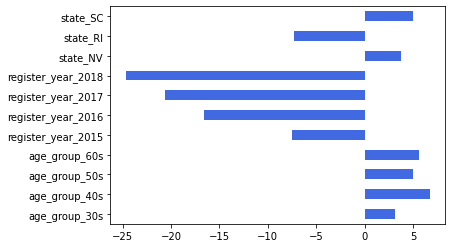

In [222]:
# 설명변수 중요도
df_reg_coef = pd.DataFrame({"Coef":reg_result_final.params.values[1:]}, index = df_raw_x.columns)
df_reg_coef.plot.barh(y ="Coef", legend = False, color= 'royalblue')

In [71]:
df_reg_coef

,Coef
age_group_30s,3.141195
age_group_40s,6.771430
age_group_50s,5.007534
age_group_60s,5.619711
register_year_2015,-7.535002
register_year_2016,-16.618920
register_year_2017,-20.583711
register_year_2018,-24.681421
state_NV,3.728616
state_RI,-7.334821


In [0]:
# register_year(등록연도)가 customer_sales에 가장 중요한 변수임을 알 수 있다. register_year이 오래될 수록 customer_sales에 음의 영향을 미치는 것을 알 수 있다. # register_year(등록연도)가 customer_sales에 가장 중요한 변수임을 알 수 있다. register_year이 오래될 수록 customer_sales에 음의 영향을 미치는 것을 알 수 있다.
# 그 다음으로는 state_RI가 중요한 변수임을 확인 할 수 있다.

# DecisionTree

In [0]:
df_cust_raw = df_cust.drop(["customer_id","drop_year","down_flag","duration",'drop_flag',"download_cnt","last_down_date","expiration","first_down_date","activation_day"],axis=1,inplace=False)
df_cust_raw

,gender,state,age,age_group,married,kids_under12,register_year,customer_sales
0,0,NC,51,50s,1,0,2014,10.997324
1,1,CA,23,20s,0,0,2014,23.661645
2,0,TX,39,30s,1,0,2014,48.821681
3,0,TX,69,60s,1,0,2014,38.822686
4,0,SC,60,60s,1,0,2014,36.841977
...,...,...,...,...,...,...,...,...
3272,0,SC,49,40s,1,0,2018,9.990000
3273,0,NV,61,60s,1,0,2018,21.770000
3274,0,CA,59,50s,0,0,2018,4.410000
3275,0,TX,36,30s,0,1,2018,13.480000


(1) age_group에 따른 dummy화 진행

In [0]:
df_cust_ageGroup = df_cust_raw.drop("age", axis = 1)

# Dummy 변수 생성

In [92]:
# get_dummies: 데이터의 문자형 변수에 대한 더미변수 생성
df_raw=pd.get_dummies(df_cust_ageGroup)
# 더미변수 생성된 데이터의 상위 5개 row를 확인
df_raw.head()

,gender,married,kids_under12,customer_sales,state_AL,state_AR,state_AZ,state_CA,state_CT,state_DC,state_DE,state_FL,state_GA,state_IA,state_IL,state_IN,state_KY,state_LA,state_MA,state_MD,state_ME,state_MI,state_MN,state_MS,state_NC,state_NH,state_NJ,state_NV,state_NY,state_OH,state_OR,state_PA,state_RI,state_SC,state_TN,state_TX,state_VA,state_VT,state_WI,state_WV,age_group_10s,age_group_20s,age_group_30s,age_group_40s,age_group_50s,age_group_60s,register_year_2014,register_year_2015,register_year_2016,register_year_2017,register_year_2018
0,0,1,0,10.997324,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0
1,1,0,0,23.661645,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0
2,0,1,0,48.821681,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
3,0,1,0,38.822686,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0
4,0,1,0,36.841977,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0


In [0]:
# state, age_group, register_year 변수에 대한 dummy화 진행

In [0]:
# 다중공선성을 문제를 고려한 변수 삭제
df_raw = df_raw.drop(['age_group_10s','register_year_2014','state_AL'], axis = 1)

In [0]:
# 목표 변수 설정
df_raw_y=df_raw['customer_sales']
df_raw_x=df_raw.drop(['customer_sales'],axis=1,inplace=False)

# 데이터 분할
df_train_x,df_test_x,df_train_y,df_test_y=train_test_split(df_raw_x,df_raw_y,test_size=0.3,random_state=1234)

In [96]:
# 모델 생성
tree_uncustomized=DecisionTreeRegressor(random_state=1234)
tree_uncustomized.fit(df_train_x,df_train_y)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=1234, splitter='best')

In [0]:
# train 및 test 설명력 결과 저장
train_score=[]
test_score=[]
# min_samples_leaf: 잎사귀 최소 자료 수
para_leaf=[n_leaf*2 for n_leaf in range(1,20)]

for v_min_samples_leaf in para_leaf:
    tree=DecisionTreeRegressor(random_state=1234, min_samples_leaf=v_min_samples_leaf)
    tree.fit(df_train_x,df_train_y)
    train_score.append(tree.score(df_train_x,df_train_y))
    test_score.append(tree.score(df_test_x,df_test_y))
    
# 결과저장
df_score_leaf=pd.DataFrame()
df_score_leaf["MinSamplesLeaf"]=para_leaf
df_score_leaf["TrainScore"]=train_score
df_score_leaf["TestScore"]=test_score

In [100]:
# 모델의 설명력 확인
df_score_leaf.round(3)

,MinSamplesLeaf,TrainScore,TestScore
0,2,0.637,0.160
1,4,0.537,0.281
2,6,0.500,0.325
3,8,0.467,0.329
4,10,0.455,0.350
5,12,0.446,0.354
6,14,0.436,0.350
7,16,0.432,0.351
8,18,0.430,0.352
9,20,0.428,0.351


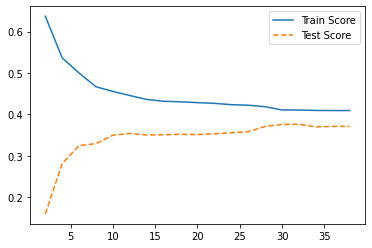

In [101]:
# 모델 설명력 그래프 확인
plt.plot(para_leaf,train_score,linestyle="-",label="Train Score")
plt.plot(para_leaf,test_score,linestyle="--",label="Test Score")
plt.legend()

In [0]:
# 잎사귀 노드 최소 자료 수 증가에 따라 모델의 설명력은 감소된다. Train, test 데이터의 성능 변화를 고려하여 10를 선택하였다.

In [103]:
# 변수명 저장
v_feature_name = df_train_x.columns

# 노드의 최소 자료 수 
tree_graph = DecisionTreeRegressor(random_state = 1234, min_samples_leaf = 10)
tree_graph.fit(df_train_x, df_train_y)


DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=10, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=1234, splitter='best')

In [104]:
# 모델 파라미터 조정 - min_samples_split: 분리 노드의 초소 자료 수 변경에 따른 모델 성능
train_score=[]
test_score=[]
# min_samples_split : 분리 노드의 최소 자료 수
para_split=[n_split*2 for n_split in range(2,20)]

for v_min_samples_split in para_split:
    tree=DecisionTreeRegressor(random_state=1234, min_samples_leaf=10,
                              min_samples_split=v_min_samples_split)
    tree.fit(df_train_x,df_train_y)
    train_score.append(tree.score(df_train_x,df_train_y))
    test_score.append(tree.score(df_test_x,df_test_y))
    
# 결과 저장
df_score_split=pd.DataFrame()
df_score_split["MinSamplesSplit"]=para_split
df_score_split["TrainScore"]=train_score
df_score_split["TestScore"]=test_score
df_score_split.round(3)

,MinSamplesSplit,TrainScore,TestScore
0,4,0.455,0.350
1,6,0.455,0.350
2,8,0.455,0.350
3,10,0.455,0.350
4,12,0.455,0.350
5,14,0.455,0.350
6,16,0.455,0.350
7,18,0.455,0.350
8,20,0.455,0.350
9,22,0.455,0.349


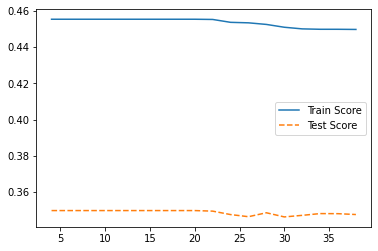

In [105]:
# 모델 설명력 그래프 확인
plt.plot(para_split,train_score,linestyle='-',label="Train Score")
plt.plot(para_split,test_score,linestyle='--',label="Test Score")
plt.legend()

In [0]:
# 분리 노드의 최소 자료 수 증가에 따라 모델의 설명력은 감소하며 train,test 데이터의 성능 변화를 고려하여 20 선택

In [107]:
# 모델 파라미터 조정 - 분리 노드의 최소 자료 수 변경 결과 비교
# 분리 노드의 최소 자료수=20 모델
tree_graph=DecisionTreeRegressor(random_state=1234,min_samples_leaf=5,min_samples_split=20)
tree_graph.fit(df_train_x,df_train_y)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=5, min_samples_split=20,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=1234, splitter='best')

In [0]:
# max_depth : 최대 깊이 변경에 따른 모델 성능
# train 및 test 설명력 결과 저장
train_score=[]
test_score=[]
# max_depth : 최대 깊이 변경
para_depth=[depth for depth in range(1,11)]

for v_max_depth in para_depth:
    tree=DecisionTreeRegressor(random_state=1234,min_samples_leaf=5,min_samples_split=20, max_depth=v_max_depth)
    tree.fit(df_train_x,df_train_y)
    train_score.append(tree.score(df_train_x,df_train_y))
    test_score.append(tree.score(df_test_x,df_test_y))
    
# 데이터 테이블로 저장
df_score_depth=pd.DataFrame()
df_score_depth["Death"]=para_depth
df_score_depth["TrainScore"]=train_score
df_score_depth["TestScore"]=test_score

In [109]:
df_score_depth.round(3)

,Death,TrainScore,TestScore
0,1,0.181,0.191
1,2,0.317,0.330
2,3,0.366,0.352
3,4,0.393,0.365
4,5,0.416,0.360
5,6,0.430,0.366
6,7,0.445,0.351
7,8,0.457,0.346
8,9,0.466,0.342
9,10,0.473,0.338


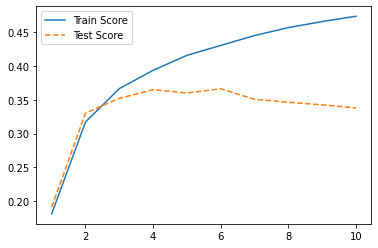

In [110]:
# 모델 설명력 그래프 확인
plt.plot(para_depth,train_score,linestyle='-',label="Train Score")
plt.plot(para_depth,test_score,linestyle='--',label="Test Score")
plt.legend()

In [0]:
# 최대 깊이 증가에 따라 모델의 설명력은 증가하며 train,test 데이터의 성능 변화를 고려하여 3를 선택

In [112]:
# 최대 깊이 = 3모델
tree_graph=DecisionTreeRegressor(random_state=1234,min_samples_leaf=5,min_samples_split=20,max_depth=3)
tree_graph.fit(df_train_x,df_train_y)


DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=3,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=5, min_samples_split=20,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=1234, splitter='best')

In [113]:
# 최종 모델 선정
tree_final=DecisionTreeRegressor(min_samples_leaf=5,min_samples_split=20,max_depth=3,random_state=1234)
tree_final.fit(df_train_x,df_train_y)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=3,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=5, min_samples_split=20,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=1234, splitter='best')

In [114]:
# 결론 도출 - feature_importances_ : 설명변수의 중요도
df_importance=pd.DataFrame()
df_importance["Feature"]=v_feature_name
df_importance["Importance"]=tree_final.feature_importances_

# 테이블을 중요도별로 정렬
df_importance.sort_values("Importance",ascending=False,inplace=True)
df_importance.round(3)

,Feature,Importance
45,register_year_2017,0.494
44,register_year_2016,0.350
43,register_year_2015,0.106
31,state_SC,0.027
25,state_NV,0.021
40,age_group_40s,0.001
33,state_TX,0.000
26,state_NY,0.000
27,state_OH,0.000
28,state_OR,0.000


Text(0, 0.5, 'Feature')

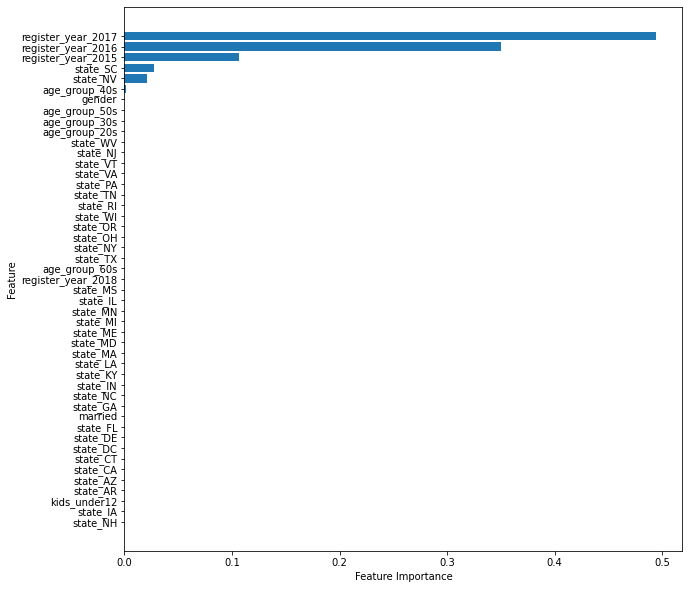

In [115]:
# 설명변수 중요도 그래프
# 중요도가 높은 변수를 상위에 그림
plt.figure(figsize=(10,10))
df_importance.sort_values("Importance",ascending=True,inplace=True)
coordinates=range(len(df_importance))
plt.barh(y=coordinates,width=df_importance['Importance'])
plt.yticks(coordinates,df_importance["Feature"])
plt.xlabel("Feature Importance")
plt.ylabel("Feature")

In [0]:
# 의사결정나무 그림에서 보았듯이 고객별 총매출에 가장 영향을 주는 변수는 register_year_2017이고, 그 다음으로는 register_year_2016이다.

In [116]:
estimator=DecisionTreeRegressor(random_state=1234)
# 구하고자 하는 parameter와 범위
param_grid={"criterion":['mse','friedman_mse','mae'],"max_features":['auto','sqrt','log2'],
           "max_depth":para_depth,"min_samples_split":para_split,
           "min_samples_leaf":para_leaf}
# 설명력이 높은 최적 parameter 찾기
grid_dt=GridSearchCV(estimator,param_grid,scoring="r2",n_jobs=-1)
grid_dt.fit(df_train_x,df_train_y)

print("best estimator model : \n{}".format(grid_dt.best_estimator_))
print("\nbest parameter  : \n{}".format(grid_dt.best_params_))
print("\nbest score  : \n{}".format(grid_dt.best_score_.round(3)))

KeyboardInterrupt: ignored

# RandomForest

In [0]:
# 목표 변수 설정
df_raw_y=df_raw['customer_sales']
df_raw_x=df_raw.drop(['customer_sales'],axis=1,inplace=False)

# 데이터 분할
df_train_x,df_test_x,df_train_y,df_test_y=train_test_split(df_raw_x,df_raw_y,test_size=0.3,random_state=1234)

In [0]:
# 모델생성
rf_uncustomized=RandomForestRegressor(random_state=1234)
rf_uncustomized.fit(df_train_x,df_train_y)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=1234, verbose=0, warm_start=False)

In [0]:
# train 및 test 설명력 결과 저장
train_score=[]
test_score=[]
# n_estimatos: 트리 수 변경 :1~100
para_n_tree=[n_tree*10 for n_tree in range(1,11)]

for v_n_estimators in para_n_tree:
    rf=RandomForestRegressor(n_estimators=v_n_estimators,random_state=1234)
    rf.fit(df_train_x,df_train_y)
    train_score.append(rf.score(df_train_x,df_train_y))
    test_score.append(rf.score(df_test_x,df_test_y))
    
# 결과 저장
df_score_n=pd.DataFrame()
df_score_n["n_estimators"]=para_n_tree
df_score_n["TrainScore"]=train_score
df_score_n["TestScore"]=test_score

In [0]:
df_score_n.round(3)

,n_estimators,TrainScore,TestScore
0,10,0.698,0.180
1,20,0.711,0.200
2,30,0.715,0.199
3,40,0.716,0.200
4,50,0.717,0.206
5,60,0.718,0.205
6,70,0.719,0.206
7,80,0.719,0.208
8,90,0.719,0.209
9,100,0.719,0.209


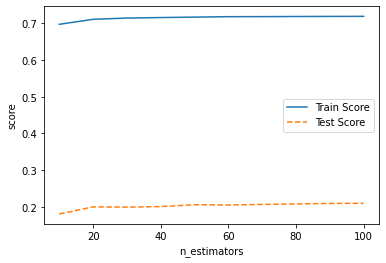

In [0]:
# 모델 설명력 그래프 확인
plt.plot(para_n_tree,train_score,linestyle='-',label="Train Score")
plt.plot(para_n_tree,test_score,linestyle='--',label="Test Score")
plt.ylabel("score")
plt.xlabel("n_estimators")
plt.legend()

In [0]:
# train 및 test 설명력 결과 저장
train_score=[]
test_score=[]
# min_samples_leaf: 잎사귀 최소 자료 수
para_leaf=[n_leaf*1 for n_leaf in range(1,21)]

for v_min_samples_leaf in para_leaf:
    rf=RandomForestRegressor(random_state=1234, n_estimators=100,
                             min_samples_leaf=v_min_samples_leaf)
    rf.fit(df_train_x,df_train_y)
    train_score.append(rf.score(df_train_x,df_train_y))
    test_score.append(rf.score(df_test_x,df_test_y))
    
# 데이터 테이블로 저장
df_score_leaf=pd.DataFrame()
df_score_leaf["MinSamplesLeaf"]=para_leaf
df_score_leaf["TrainScore"]=train_score
df_score_leaf["TestScore"]=test_score

In [0]:
# 모델 설명력 확인
df_score_leaf.round(3)

,MinSamplesLeaf,TrainScore,TestScore
0,1,0.719,0.209
1,2,0.616,0.305
2,3,0.561,0.343
3,4,0.527,0.354
4,5,0.502,0.363
5,6,0.483,0.363
6,7,0.471,0.364
7,8,0.462,0.366
8,9,0.455,0.366
9,10,0.449,0.367


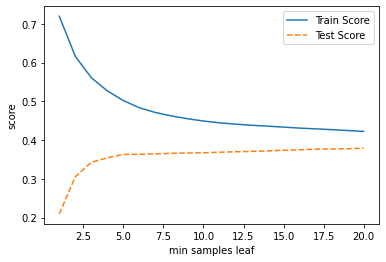

In [0]:
# 모델 설명력 확인
df_score_leaf.round(3)

# 모델 설명력 그래프 확인
plt.plot(para_leaf,train_score,linestyle='-',label="Train Score")
plt.plot(para_leaf,test_score,linestyle='--',label="Test Score")
plt.ylabel("score")
plt.xlabel("min samples leaf")
plt.legend()

In [0]:
# min_samples_split: 분리 노드의 최소 자료 수 변경에 따른 모델 성능
# train 및 test 설명력 결과 저장
train_score=[]
test_score=[]
# min_samples_leaf: 잎사귀 최소 자료 수
para_leaf=[n_split*2 for n_split in range(2,21)]

for v_min_samples_split in para_split:
    rf=RandomForestRegressor(random_state=1234, n_estimators=100,
                             min_samples_leaf=10,min_samples_split=v_min_samples_split)
    rf.fit(df_train_x,df_train_y)
    train_score.append(rf.score(df_train_x,df_train_y))
    test_score.append(rf.score(df_test_x,df_test_y))
    
# 데이터 테이블로 저장
df_score_leaf=pd.DataFrame()
df_score_leaf["MinSamplesSplit"]=para_split
df_score_leaf["TrainScore"]=train_score
df_score_leaf["TestScore"]=test_score

In [0]:
# 모델 설명력 확인
df_score_split.round(3)

,MinSamplesSplit,TrainScore,TestScore
0,4,0.455,0.350
1,6,0.455,0.350
2,8,0.455,0.350
3,10,0.455,0.350
4,12,0.455,0.350
5,14,0.455,0.350
6,16,0.455,0.350
7,18,0.455,0.350
8,20,0.455,0.350
9,22,0.455,0.349


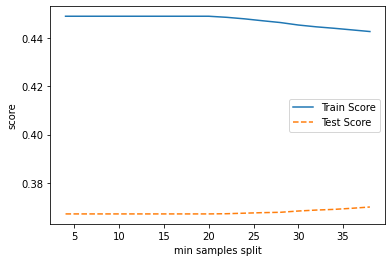

In [0]:
# 모델 설명력 그래프 확인
plt.plot(para_split,train_score,linestyle="-",label="Train Score")
plt.plot(para_split,test_score,linestyle='--',label="Test Score")
plt.ylabel("score")
plt.xlabel("min samples split")
plt.legend()

In [0]:
# max_depth : 최대 깊이 변경에 따른 모델 성능
# train 및 test 설명력 결과 저장
train_score=[]
test_score=[]
# max_depth : 최대 깊이 변경
para_depth=[depth for depth in range(1,11)]

for v_max_depth in para_depth:
    rf=RandomForestRegressor(random_state=1234,n_estimators=100,min_samples_leaf=10,min_samples_split=20, 
                             max_depth=v_max_depth)
    rf.fit(df_train_x,df_train_y)
    train_score.append(rf.score(df_train_x,df_train_y))
    test_score.append(rf.score(df_test_x,df_test_y))
# 데이터 테이블로 저장
df_score_depth=pd.DataFrame()
df_score_depth["Depth"]=para_depth
df_score_depth["TrainScore"]=train_score
df_score_depth["TestScore"]=test_score   

In [0]:
df_score_depth.round(3)

,Depth,TrainScore,TestScore
0,1,0.181,0.191
1,2,0.319,0.331
2,3,0.368,0.353
3,4,0.396,0.364
4,5,0.412,0.374
5,6,0.424,0.376
6,7,0.432,0.375
7,8,0.438,0.373
8,9,0.442,0.371
9,10,0.445,0.370


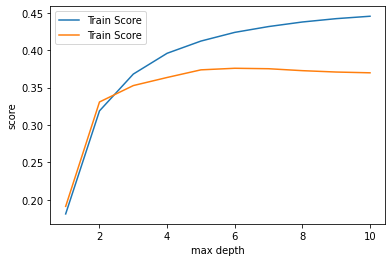

In [0]:
# 모델 설명력 그래프 확인
plt.plot(para_depth,train_score,linestyle='-',label="Train Score")
plt.plot(para_depth,test_score,linestyle='-',label="Train Score")
plt.ylabel("score")
plt.xlabel("max depth")
plt.legend()

In [0]:
# 최종 모델 생성
rf_final=RandomForestRegressor(random_state=1234, n_estimators=100,min_samples_leaf=10,
                               min_samples_split=10,max_depth=8)
rf_final.fit(df_train_x,df_train_y)
# Train 데이터 설명력
print("Score on training set: {:.3f}".format(rf_final.score(df_train_x,df_train_y)))
print("Score on test set: {:.3f}".format(rf_final.score(df_test_x,df_test_y)))
rf_final

Score on training set: 0.438
Score on test set: 0.373


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=8, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=10,
                      min_samples_split=10, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=1234, verbose=0, warm_start=False)

In [0]:
# 결론 도출 - 최종 모델 시각화 ( 생성도니 트리 100개 중에서 임의의 3개 확인)
# 변수명 저장
v_feature_name=df_train_x.columns

In [0]:
# 결론 도출 - feature_importances_ : 설명변수의 중요도
df_importance=pd.DataFrame()
df_importance["Feature"]=v_feature_name
df_importance["Importance"]=rf_final.feature_importances_

# 테이블을 중요도별로 정렬
df_importance.sort_values("Importance",ascending=False,inplace=True)
df_importance.round(3)


,Feature,Importance
45,register_year_2017,0.404
44,register_year_2016,0.286
43,register_year_2015,0.087
38,age_group_20s,0.051
25,state_NV,0.033
31,state_SC,0.024
1,married,0.019
0,gender,0.018
42,age_group_60s,0.011
40,age_group_40s,0.011


Text(0, 0.5, 'Feature')

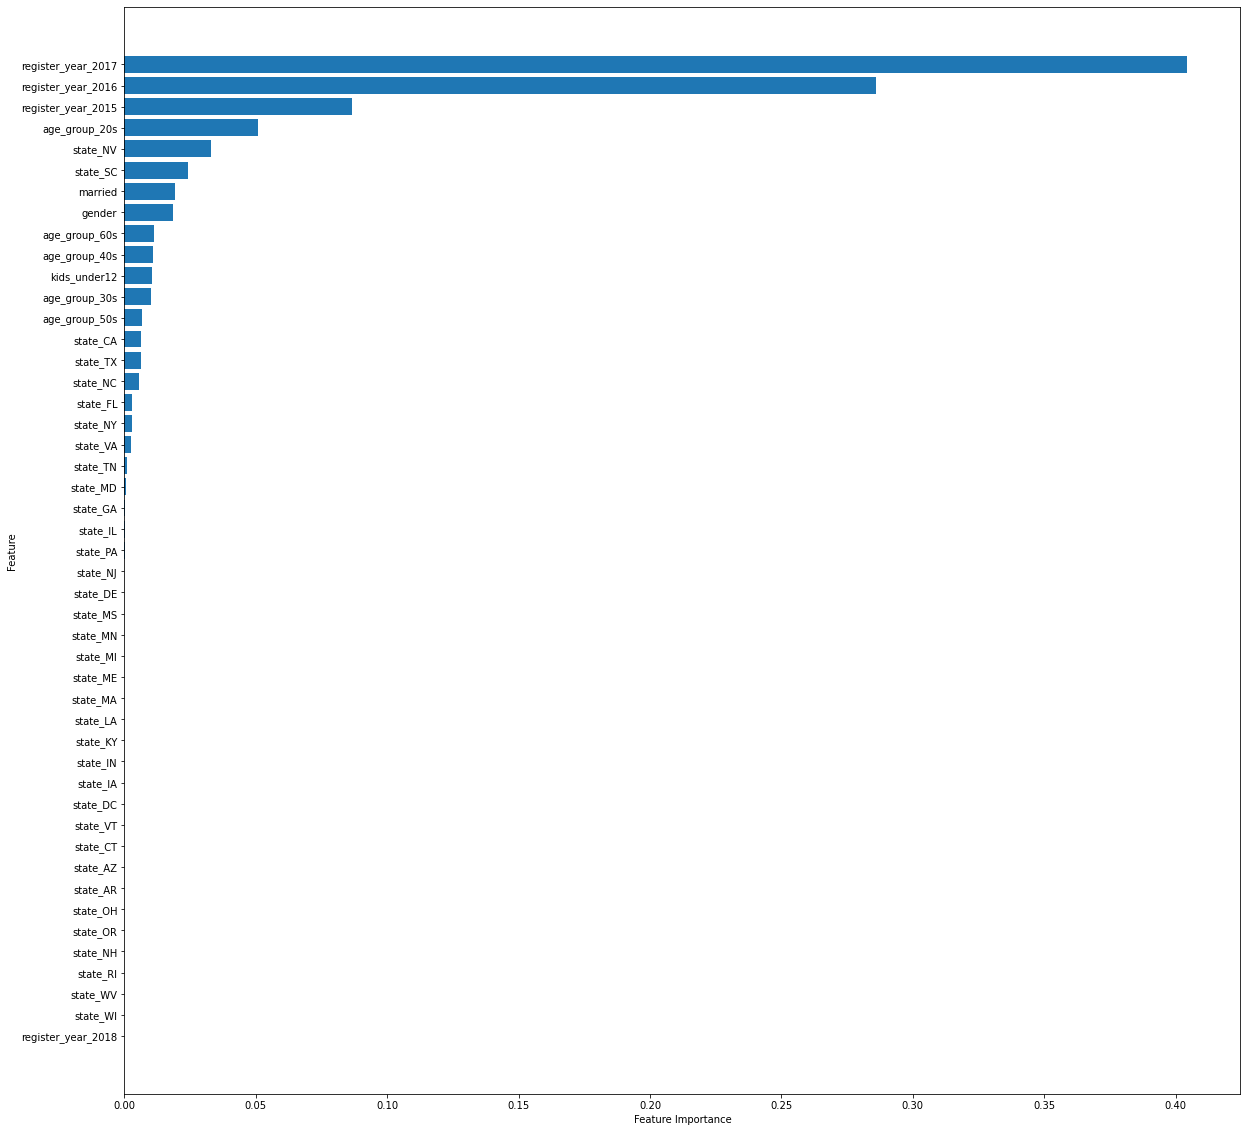

In [0]:
# 설명변수 중요도 그래프
# 중요도가 높은 변수를 상위에 그림
plt.figure(figsize=(20,20))
df_importance.sort_values("Importance",ascending=True,inplace=True)
coordinates=range(len(df_importance))
plt.barh(y=coordinates,width=df_importance['Importance'])
plt.yticks(coordinates,df_importance["Feature"])
plt.xlabel("Feature Importance")
plt.ylabel("Feature")

In [0]:
# 의사결정나무와 같이 register_year_2017, register_year_2016이 가장 중요한 변수임을 알 수 있다

# GradientBoosting

In [0]:
# 목표 변수 설정
df_raw_y=df_raw['customer_sales']
df_raw_x=df_raw.drop(['customer_sales'],axis=1,inplace=False)

# 데이터 분할
df_train_x,df_test_x,df_train_y,df_test_y=train_test_split(df_raw_x,df_raw_y,test_size=0.3,random_state=1234)

In [0]:
# 모델 생성 : GradientBoostingRegressor
gb_uncustomized=GradientBoostingRegressor(random_state=1234)
gb_uncustomized.fit(df_train_x,df_train_y)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=1234, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [0]:
# n_estimators : 트리 수 변경에 따른 모델 성능
train_score=[]
test_score=[]
# n_estimators : 트리 수 변경(1~100)
para_n_tree=[n_tree*10 for n_tree in range(1,11)]

for v_n_estimators in para_n_tree:
    gb=GradientBoostingRegressor(random_state=1234,n_estimators=v_n_estimators)
    gb.fit(df_train_x,df_train_y)
    train_score.append(gb.score(df_train_x,df_train_y))
    test_score.append(gb.score(df_test_x,df_test_y))
    
# 결과저장
df_score_n=pd.DataFrame()
df_score_n["Estimators"]=para_n_tree
df_score_n["TrainScore"]=train_score
df_score_n["TestScore"]=test_score

In [0]:
# 모델 설명력 확인
df_score_n.round(3)

,Estimators,TrainScore,TestScore
0,10,0.327,0.322
1,20,0.380,0.372
2,30,0.400,0.386
3,40,0.411,0.391
4,50,0.421,0.391
5,60,0.428,0.390
6,70,0.433,0.390
7,80,0.439,0.388
8,90,0.443,0.387
9,100,0.446,0.387


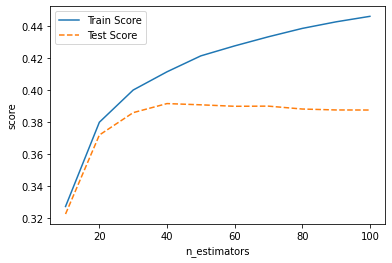

In [0]:
# 모델 설명력 그래프 확인
plt.plot(para_n_tree,train_score,linestyle="-",label="Train Score")
plt.plot(para_n_tree,test_score,linestyle='--',label="Test Score")
plt.ylabel("score")
plt.xlabel("n_estimators")
plt.legend()

In [0]:
# train 및 test 설명력 결과 저장
train_score=[]
test_score=[]
# n_estimatos: 트리 수 변경 :1~100
para_leaf=[n_leaf*1 for n_leaf in range(1,21)]

for v_min_samples_leaf in para_leaf:
    rf=GradientBoostingRegressor(n_estimators=50,random_state=1234,
                                min_samples_leaf=v_min_samples_leaf)
    rf.fit(df_train_x,df_train_y)
    train_score.append(rf.score(df_train_x,df_train_y))
    test_score.append(rf.score(df_test_x,df_test_y))
    
# 결과 저장
df_score_leaf=pd.DataFrame()
df_score_leaf["MinSamplesLeaf"]=para_leaf
df_score_leaf["TrainScore"]=train_score
df_score_leaf["TestScore"]=test_score

In [0]:
# 모델 설명력 확인
df_score_leaf.round(3)

,MinSamplesLeaf,TrainScore,TestScore
0,1,0.421,0.391
1,2,0.419,0.393
2,3,0.418,0.391
3,4,0.418,0.393
4,5,0.417,0.393
5,6,0.418,0.393
6,7,0.415,0.386
7,8,0.414,0.384
8,9,0.414,0.384
9,10,0.413,0.385


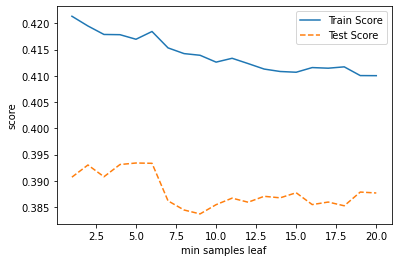

In [0]:
# 모델 설명력 그래프 확인
plt.plot(para_leaf,train_score,linestyle="-",label="Train Score")
plt.plot(para_leaf,test_score,linestyle='--',label="Test Score")
plt.ylabel("score")
plt.xlabel("min samples leaf")
plt.legend()

In [0]:
# train 및 test 설명력 결과 저장
train_score=[]
test_score=[]
# min_samples_split : 분할하기 위한 노드의 최소 자료 수
para_split=[n_split*2 for n_split in range(1,21)]

for v_min_samples_split in para_split:
    gb=GradientBoostingRegressor(random_state=1234,n_estimators=50, min_samples_leaf=6,
                                min_samples_split=v_min_samples_split)
    gb.fit(df_train_x,df_train_y)
    train_score.append(gb.score(df_train_x,df_train_y))
    test_score.append(gb.score(df_test_x,df_test_y))
    
# 결과 저장
df_score_split=pd.DataFrame()
df_score_split["MinSamplesSplit"]=para_split
df_score_split["TrainScore"]=train_score
df_score_split["TestScore"]=test_score

In [0]:
# 모델 설명력 확인
df_score_split.round(3)

,MinSamplesSplit,TrainScore,TestScore
0,2,0.418,0.393
1,4,0.418,0.393
2,6,0.418,0.393
3,8,0.418,0.393
4,10,0.418,0.393
5,12,0.418,0.393
6,14,0.418,0.395
7,16,0.418,0.395
8,18,0.418,0.395
9,20,0.418,0.395


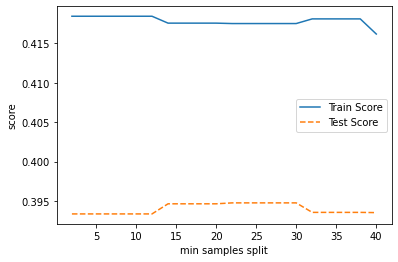

In [0]:
# 모델 설명력 그래프 확인
plt.plot(para_split,train_score,linestyle="-",label="Train Score")
plt.plot(para_split,test_score,linestyle='--',label="Test Score")
plt.ylabel("score")
plt.xlabel("min samples split")
plt.legend()

In [0]:
# max_depth : 최대 깊이 변경에 따른 모델 성능
# train 및 test 설명력 결과 저장
train_score=[]
test_score=[]
# max_depth : 최대 깊이 변경
para_depth=[depth for depth in range(1,11)]

for v_max_depth in para_depth:
    gb=GradientBoostingRegressor(random_state=1234,n_estimators=50,min_samples_leaf=6,min_samples_split=15, 
                             max_depth=v_max_depth)
    gb.fit(df_train_x,df_train_y)
    train_score.append(gb.score(df_train_x,df_train_y))
    test_score.append(gb.score(df_test_x,df_test_y))
# 데이터 테이블로 저장
df_score_depth=pd.DataFrame()
df_score_depth["Depth"]=para_depth
df_score_depth["TrainScore"]=train_score
df_score_depth["TestScore"]=test_score   

In [0]:
# 모델 설명력 확인
df_score_depth.round(3)

,Depth,TrainScore,TestScore
0,1,0.314,0.324
1,2,0.386,0.380
2,3,0.418,0.395
3,4,0.443,0.387
4,5,0.470,0.382
5,6,0.488,0.372
6,7,0.508,0.364
7,8,0.520,0.360
8,9,0.534,0.355
9,10,0.543,0.348


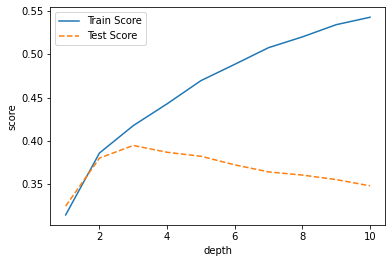

In [0]:
# 모델 설명력 그래프 확인
plt.plot(para_depth,train_score,linestyle="-",label="Train Score")
plt.plot(para_depth,test_score,linestyle='--',label="Test Score")
plt.ylabel("score")
plt.xlabel("depth")
plt.legend()

In [0]:
# train 및 test 설명력 결과 저장
train_score=[]
test_score=[]
# learning rate : 합습률 변경 0.1~0.9
para_lr=[lr*0.1 for lr in range(1,10)]

for v_learning_rate in para_lr:
    gb=GradientBoostingRegressor(random_state=1234, n_estimators=50,min_samples_leaf=6, 
                                min_samples_split=15,max_depth=3,learning_rate=v_learning_rate)
    gb.fit(df_train_x,df_train_y)
    train_score.append(gb.score(df_train_x,df_train_y))
    test_score.append(gb.score(df_test_x,df_test_y))
    
# 결과저장
df_score_lr=pd.DataFrame()
df_score_lr['LearningRate']=para_lr
df_score_lr["TrainScore"]=train_score
df_score_lr["TestScore"]=test_score

In [0]:
# 모델 설명력 확인
df_score_lr.round(3)

,LearningRate,TrainScore,TestScore
0,0.1,0.418,0.395
1,0.2,0.437,0.389
2,0.3,0.456,0.385
3,0.4,0.467,0.378
4,0.5,0.477,0.375
5,0.6,0.483,0.367
6,0.7,0.493,0.365
7,0.8,0.504,0.333
8,0.9,0.501,0.319


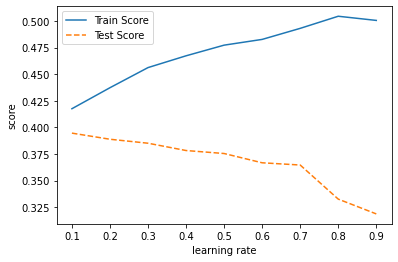

In [0]:
# 모델 설명력 그래프 확인
plt.plot(para_lr,train_score,linestyle='-',label='Train Score')
plt.plot(para_lr,test_score,linestyle='--',label="Test Score")
plt.ylabel("score")
plt.xlabel("learning rate")
plt.legend()

In [0]:
# 최종 모델 생성
gb_final=GradientBoostingRegressor(random_state=1234,n_estimators=50,min_samples_leaf=6,
                                  min_samples_split=15,max_depth=3,learning_rate=0.3)
gb_final.fit(df_train_x,df_train_y)

# Train 데이터 설명력
print("Score on training set: {:.3f}".format(gb_final.score(df_train_x,df_train_y)))
print("Score on test set: {:.3f}".format(gb_final.score(df_test_x,df_test_y)))


Score on training set: 0.456
Score on test set: 0.385


In [0]:
# 변수명 저장
v_feature_name=df_train_x.columns

# 결론 도출 - feature_importances_ : 설명변수의 중요도
df_importance=pd.DataFrame()
df_importance["Feature"]=v_feature_name
df_importance["Importance"]=gb_final.feature_importances_

# 테이블을 중요도별로 정렬
df_importance.sort_values("Importance",ascending=False,inplace=True)
df_importance.round(3)

,Feature,Importance
45,register_year_2017,0.409
44,register_year_2016,0.287
43,register_year_2015,0.085
38,age_group_20s,0.039
25,state_NV,0.032
31,state_SC,0.025
46,register_year_2018,0.014
40,age_group_40s,0.013
2,kids_under12,0.011
0,gender,0.010


Text(0, 0.5, 'Feature')

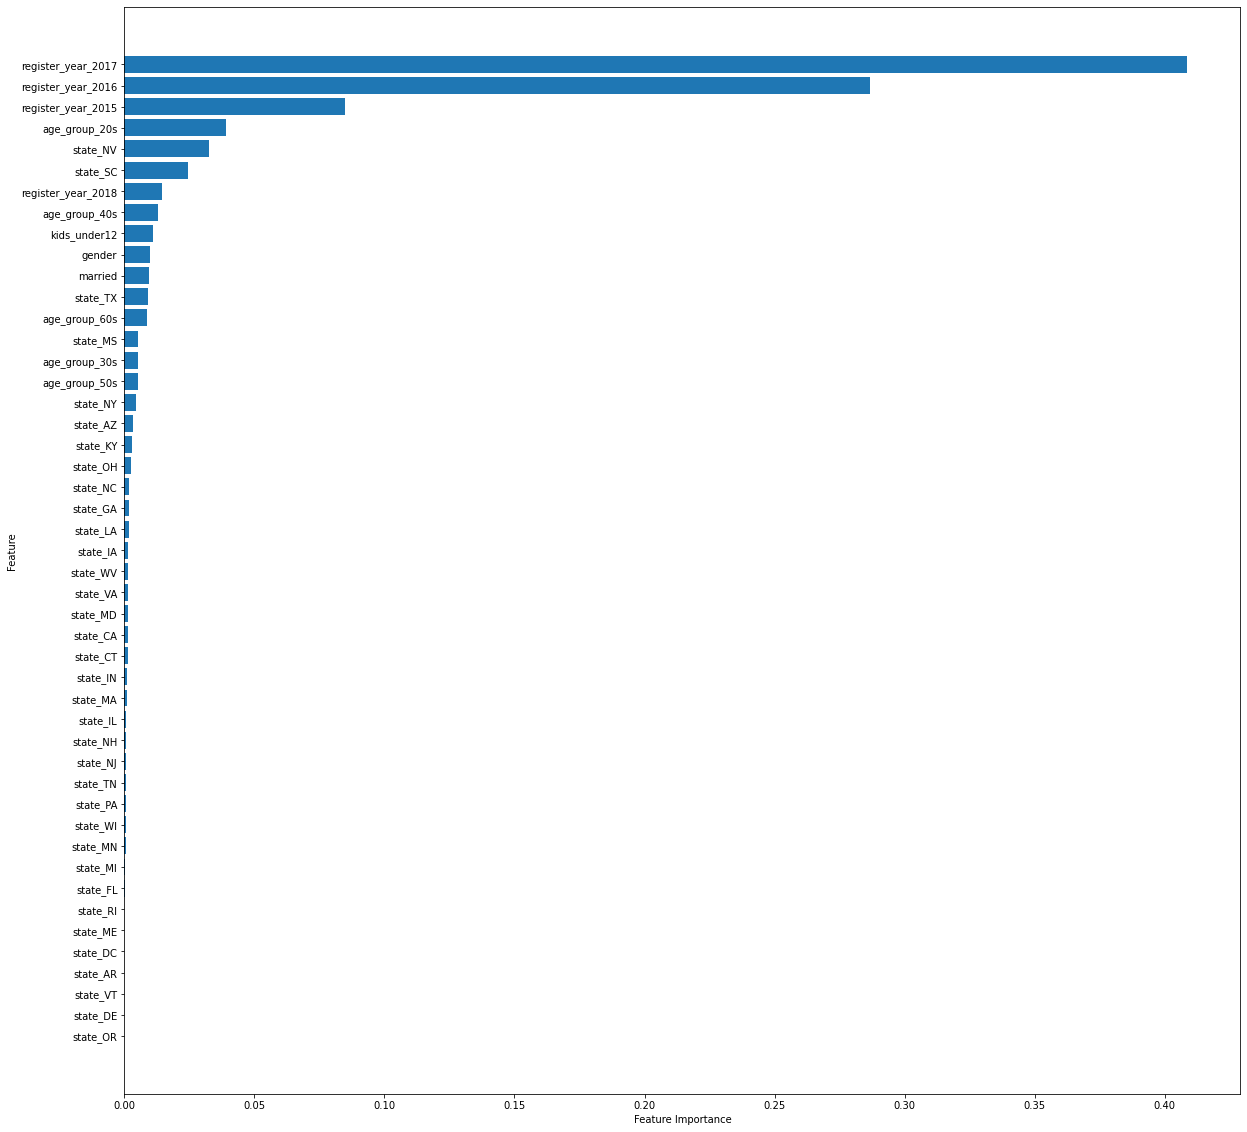

In [0]:
# 설명변수 중요도 그래프
# 중요도가 높은 변수를 상위에 그림
plt.figure(figsize=(20,20))
df_importance.sort_values("Importance",ascending=True,inplace=True)
coordinates=range(len(df_importance))
plt.barh(y=coordinates,width=df_importance['Importance'])
plt.yticks(coordinates,df_importance["Feature"])
plt.xlabel("Feature Importance")
plt.ylabel("Feature")

In [0]:
# 의사결정나무모델, 랜덤포레스트모델과 같이 register_year_2017, register_year_2016이 가장 중요한 변수임을 알 수 있다

# 모델 평가

In [0]:
# 목표 변수 설정
df_raw_y=df_raw['customer_sales']
df_raw_x=df_raw.drop(['customer_sales'],axis=1,inplace=False)

# 데이터 분할
df_train_x,df_test_x,df_train_y,df_test_y=train_test_split(df_raw_x,df_raw_y,test_size=0.3,random_state=1234)

In [120]:

# Decision Tree
dt_model=DecisionTreeRegressor(min_samples_leaf=5,min_samples_split=20,max_depth=3,random_state=1234)
dt_model.fit(df_train_x, df_train_y)

# Random Forest
rf_model = RandomForestRegressor(random_state=1234, n_estimators=100,min_samples_leaf=10,min_samples_split=10,max_depth=8)
rf_model.fit(df_train_x, df_train_y)

# Gradient Boosting
gb_model = GradientBoostingRegressor(n_estimators = 50, min_samples_leaf=6, min_samples_split=15,max_depth=3,learning_rate = 0.3, random_state = 1234)
gb_model.fit(df_train_x, df_train_y)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.3, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=6, min_samples_split=15,
                          min_weight_fraction_leaf=0.0, n_estimators=50,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=1234, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [0]:
def root_mean_squared_error(y_true, y_pred):
  return np.sqrt(mean_squared_error(y_true, y_pred))

def mean_absolute_percentage_error(y_true,y_pred):
  return np.mean(np.abs(y_true - y_pred))*100

In [0]:
# 예측 및 평가
# 모델 리스트, 그래프를 생성
models = ['회귀분석','의사결정나무','랜덤포레스트','그래디언트 부스팅']

# 평가리스트 초기화
mse, rmse, mae, mape = [], [], [], []

In [0]:
# 회귀분석
# 예측
lr_y_pred = reg_result_final.predict(df_raw_x)

# 평가
mse=mean_squared_error(df_test_y,lr_y_pred)
rmse=root_mean_squared_error(df_test_y,lr_y_pred)
mae=mean_absolute_error(df_test_y,lr_y_pred)
mape=mean_absolute_percentage_error(df_test_y,lr_y_pred)

print(mse)
print(rmse)
print(mae)
print(mape)

In [0]:
# 의사결정나무
# 예측
dt_y_pred = dt_model.predict(df_test_x)

# 평가
mse.append(mean_squared_error(df_test_y,dt_y_pred))
rmse.append(root_mean_squared_error(df_test_y,dt_y_pred))
mae.append(mean_absolute_error(df_test_y,dt_y_pred))
mape.append(mean_absolute_percentage_error(df_test_y,dt_y_pred))

mse=mean_squared_error(df_test_y,dt_y_pred)
rmse=root_mean_squared_error(df_test_y,dt_y_pred)
mae=mean_absolute_error(df_test_y,dt_y_pred)
mape=mean_absolute_percentage_error(df_test_y,dt_y_pred)

print(mse)
print(rmse)
print(mae)
print(mape)

126.56207797302956
11.249981243230122
8.718925154058082
871.8925154058101


In [0]:
# 랜덤포레스트
# 예측
rf_y_pred = rf_model.predict(df_test_x)

# 평가
# mse.append(mean_squared_error(df_test_y,rf_y_pred))
# rmse.append(root_mean_squared_error(df_test_y,rf_y_pred))
# mae.append(mean_absolute_error(df_test_y,rf_y_pred))
# mape.append(mean_absolute_percentage_error(df_test_y,rf_y_pred))

mse=mean_squared_error(df_test_y,rf_y_pred)
rmse=root_mean_squared_error(df_test_y,rf_y_pred)
mae=mean_absolute_error(df_test_y,rf_y_pred)
mape=mean_absolute_percentage_error(df_test_y,rf_y_pred)

print(mse)
print(rmse)
print(mae)
print(mape)

122.5240255701918
11.069057122004196
8.391667796301242
839.1667796301239


In [0]:
# 그래디언트 부스팅
# 예측
gb_y_pred = dt_model.predict(df_test_x)

# 평가
# mse.append(mean_squared_error(df_test_y,gb_y_pred))
# rmse.append(root_mean_squared_error(df_test_y,gb_y_pred))
# mae.append(mean_absolute_error(df_test_y,gb_y_pred))
# mape.append(mean_absolute_percentage_error(df_test_y,gb_y_pred))

mse=mean_squared_error(df_test_y,gb_y_pred)
rmse=root_mean_squared_error(df_test_y,gb_y_pred)
mae=mean_absolute_error(df_test_y,gb_y_pred)
mape=mean_absolute_percentage_error(df_test_y,gb_y_pred)

print(mse)
print(rmse)
print(mae)
print(mape)

126.56207797302956
11.249981243230122
8.718925154058082
871.8925154058101
